In [14]:
%pip install pandas plotly


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
import panel as pn
pn.extension("tabulator")
import matplotlib.pyplot as plt
import seaborn as sns
import os

Country- Stock Index 

USA - S&P500
IND - BSE SENSEX
UK  - FTSE 100
CHN - SSE

Multiline Graph: comparing annual returns of various indices over the past decade

In [16]:

def multiline_1():
    df = pd.read_csv("index_data.csv")

    # Step 2: Filter out rows with missing 'Annual_returns'
    returns_df = df[df['Annual_returns'].notnull()]


    # Step 3: Create a multiline plot
    fig = px.line(returns_df, 
                x='Year', 
                y='Annual_returns', 
                color='Index_name',
                title='Annual returns for various indices over the past decade',
                labels={'Annual_returns': 'Annual Returns (%)', 'Year': 'Year'},
                line_group='Index_name',
                hover_name='Index_name')

    # Step 4: Update layout for better visualization
    fig.update_layout(xaxis_title="Year", 
                    yaxis_title="Annual Returns (%)", 
                    legend_title="Index Name", 
                    yaxis=dict(tickformat=".2f"),
                    height=400,  # Height of the entire figure in pixels
        width=600,)

    # Display the figure
    return fig



Bar Chart: comparing CAGR Across Different Indices

In [17]:
def bar_chart():
    df = pd.read_csv("index_data.csv")
    df= df.dropna(subset=['CAGR'])

    fig = px.bar(df, x='Index_name', y='CAGR', 
                title='CAGR comparison for different indices',
                labels={'CAGR': 'CAGR (%)', 'Index_name': 'Indices'},
                hover_data={'CAGR': ':.2f'})

    fig.update_layout(
        bargap=0.2,  # Space between bars (value between 0 and 1, where 1 means no bars are visible)
        bargroupgap=0.1,  # Space between groups of bars
        height=400,  # Height of the entire figure in pixels
        width=600,  # Width of the entire figure in pixels
    )


    return fig


Multiline Graph: comparing the volume trends of various indices over the past decade

In [18]:

def multiline_2():

    df = pd.read_csv("index_data.csv")

    # Step 2: Filter out rows with missing 'Volume'
    returns_df = df[df['Volume'].notnull()]

    returns_df['Volume'] = returns_df['Volume'] / 1e9


    # Step 3: Create a multiline plot
    fig = px.line(returns_df, 
                x='Year', 
                y='Volume', 
                color='Index_name',
                title='Volume trends for various indices over the past decade',
                labels={'Volume': 'Volume in billions', 'Year': 'Year'},
                line_group='Index_name',
                hover_name='Index_name')

    # Step 4: Update layout for better visualization
    fig.update_layout(xaxis_title="Year", 
                    yaxis_title="Volume in billions", 
                    legend_title="Index Name", 
                    yaxis=dict(tickformat="."),
                     height=400,  # Height of the entire figure in pixels
                     width=600,
                    )

    # Display the figure
    return fig


Scatter Plot: comparing GDP growth of countries with their major stock index returns for the previous decade

In [19]:
def scatter_1():

    df = pd.read_csv("index_data.csv")

    df_clean = df.dropna(subset=['Gdp_growth', 'Annual_returns'])



    # Create a color map for the indices
    colors = {'S&P 500': 'blue', 'S&P BSE SENSEX': 'red', 'FTSE 100': 'green', 'SSE Composite Index':'violet'}  # Add more indices and colors as needed

    # Plot
    plt.figure(figsize=(8,5))

    for index, color in colors.items():
        subset = df_clean[df_clean['Index_name'] == index]
        plt.scatter(subset['Gdp_growth'], subset['Annual_returns'], c=color, label=index)

    plt.title('GDP Growth vs Stock Index Returns')
    plt.xlabel('GDP Growth (%)')
    plt.ylabel('Stock Index Returns (%)')
    plt.legend(title='Index_name')

    return pn.pane.Matplotlib(plt.gcf())



Scatter Plot: comparing inflation rate of countries with their major stock index returns for the previous decade

In [20]:
def scatter_2():

    df = pd.read_csv("index_data.csv")

    df_clean = df.dropna(subset=['Inflation Rate', 'Annual_returns'])



    # Create a color map for the indices
    colors = {'S&P 500': 'blue', 'S&P BSE SENSEX': 'red', 'FTSE 100': 'green', 'SSE Composite Index':'violet'}  # Add more indices and colors as needed

    # Plot
    plt.figure(figsize=(8,5))

    for index, color in colors.items():
        subset = df_clean[df_clean['Index_name'] == index]
        plt.scatter(subset['Inflation Rate'], subset['Annual_returns'], c=color, label=index)

    plt.title('Inflation Rate vs Stock Index Returns')
    plt.xlabel('Inflation Rate (%)')
    plt.ylabel('Stock Index Returns (%)')
    plt.legend(title='Index_name')

    return pn.pane.Matplotlib(plt.gcf())




Scatter Plot: comparing market capitalization of countries with CAGR of their major stock index returns for the last decade
## CAGR - Compound Annual Growth Rate 

CAGR =( End_yr/ Beginning_yr )^ 1/n - 1 
n - period(10yrs)


In [21]:
def scatter_3():

    df = pd.read_csv("markets.csv")

    df_clean = df.dropna(subset=['Marketcap', 'CAGR'])



    # Create a color map for the indices
    colors = {'USA': 'blue', 'IND': 'red', 'UK': 'green', 'CHN':'violet'}  # Add more indices and colors as needed

    # Plot
    plt.figure(figsize=(8,5))

    for country, color in colors.items():
        subset = df_clean[df_clean['Country'] == country]
        plt.scatter(subset['Marketcap'], subset['CAGR'], c=color, label= country)

    plt.title('Market cap vs CAGR')
    plt.xlabel('Market cap(%)')
    plt.ylabel('CAGR (%)')
    plt.legend(title='Country')
    plt.grid(False)
    return pn.pane.Matplotlib(plt.gcf())


Heatmap: visualizing correlations between GDP Growth, Annual Returns, Inflation Rate, and CAGR

In [22]:
def heatmap():

    df = pd.read_csv("index_data.csv")
    df['Gdp_growth'] = df['Gdp_growth'].astype(float)
    df['Annual_returns'] = df['Annual_returns'].astype(float)
    df['Inflation Rate'] = df['Inflation Rate'].astype(float)
    df['CAGR'] = df['CAGR'].astype(float)

    # Drop rows with missing values in 'Gdp_growth' and 'Annual_returns'
    df = df.dropna(subset=['Gdp_growth', 'Annual_returns','Inflation Rate','CAGR'])

    # Create a DataFrame with the two columns to analyze their correlation
    correlation_matrix = df[['Gdp_growth', 'Annual_returns','Inflation Rate','CAGR']].corr()

    # Plot the heatmap
    plt.figure(figsize=(8,5))  # Optional: Adjust the figure size
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap of GDP Growth, Annual Returns, Inflation Rate, and CAGR')
    return pn.pane.Matplotlib(plt.gcf())



Pie Chart: market capitalization distribution among China, USA, India, and UK

In [23]:
def pie():
    df = pd.read_csv("cap.csv")

    df_clean = df.dropna(subset=['Country', 'Market_cap'])

    color_scale = px.colors.qualitative.Set2

    pie_fig = px.pie(df_clean, values='Market_cap', names='Country', color_discrete_sequence = color_scale)
    pie_fig.update_traces(textposition='inside', direction ='clockwise', hole=0.3, textinfo="label+percent")


    pie_fig.update_layout(uniformtext_minsize=10, 
                            uniformtext_mode='hide',
                            title="Market Capitalization Distribution Among China, USA, India, and UK",
                             height=400,  # Height of the entire figure in pixels
                     width=600,
                            )
    return pie_fig


Sector distribution analysis for each index

In [24]:
def make_pie_chart(df_clean, file_name):
    color_scale = px.colors.qualitative.Set2

    pie_fig = px.pie(df_clean, values='Percentage', names='Sector', color_discrete_sequence = color_scale)
    pie_fig.update_traces(textposition='inside', direction ='clockwise', hole=0.3, textinfo="label+percent")


    pie_fig.update_layout(uniformtext_minsize=10, 
                            uniformtext_mode='hide',
                            title= os.path.splitext(os.path.basename(file_name))[0]+" Sector Analysis",
                            width=600, height=400

   )
    return pie_fig



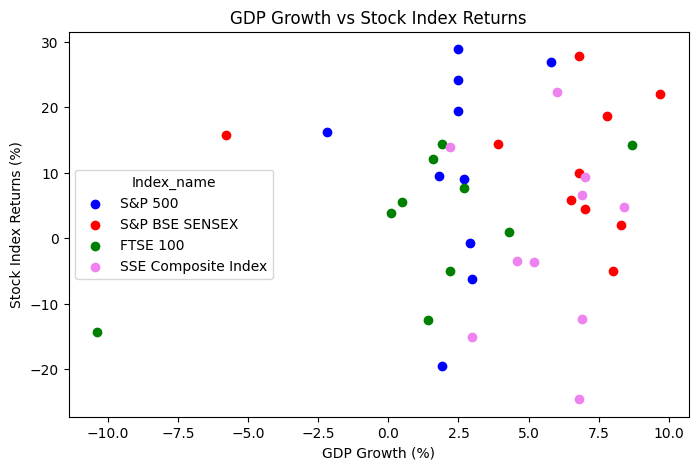

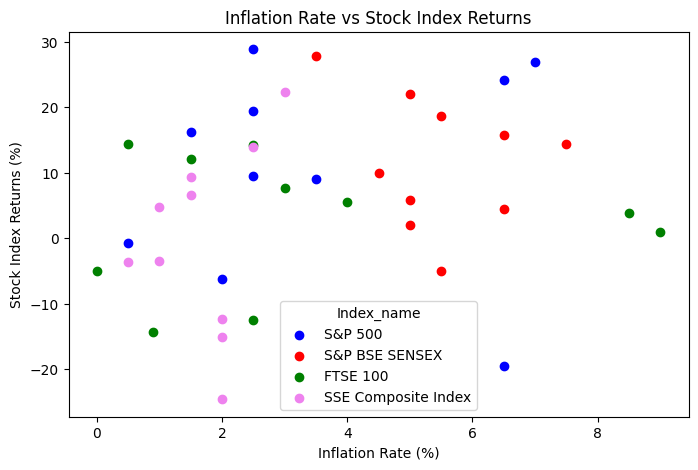

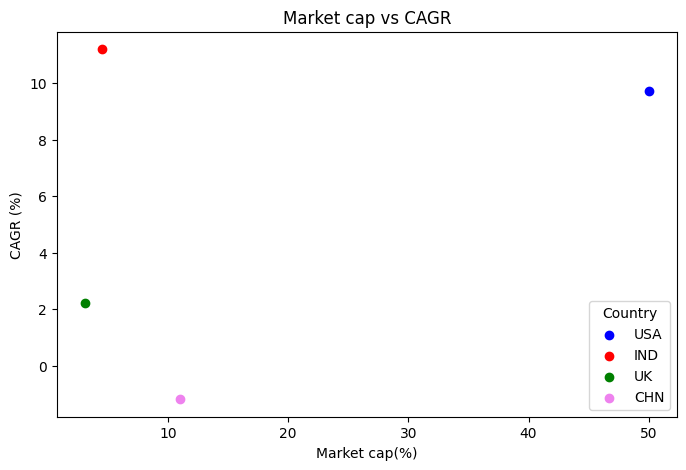

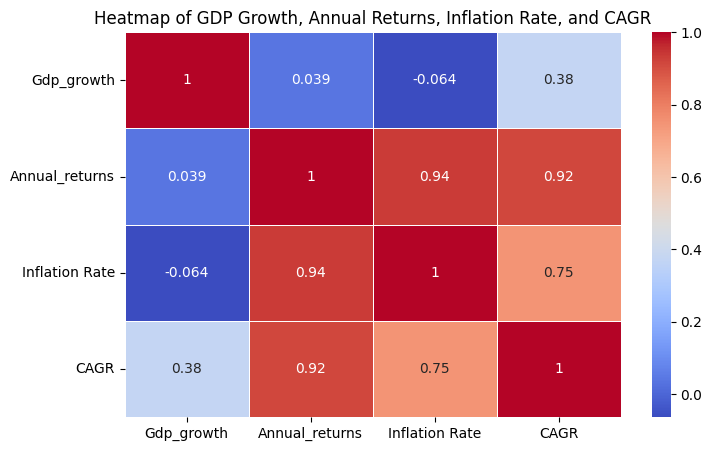

In [25]:
#multiline
multiline_chart_1 = multiline_1()
bar_chart_1= bar_chart()
multiline_chart_2 = multiline_2()
piechart = pie()


#
scatter_plot_1 = scatter_1()
scatter_plot_2 = scatter_2()
scatter_plot_3 = scatter_3()
heatmap_1 = heatmap()

#

pie_1 = make_pie_chart(df_clean=pd.read_csv("S&P500.csv").dropna(subset=['Sector', 'Percentage']),file_name="S&P500.csv")
pie_2 = make_pie_chart(df_clean=pd.read_csv("BSE.csv").dropna(subset=['Sector', 'Percentage']),file_name="BSE.csv")
pie_3 = make_pie_chart(df_clean=pd.read_csv("FTSE100.csv").dropna(subset=['Sector', 'Percentage']),file_name="FTSE100.csv")
pie_4 = make_pie_chart(df_clean=pd.read_csv("SSE.csv").dropna(subset=['Sector', 'Percentage']),file_name="SSE.csv")


tabs =pn.Tabs( 
                        ('Comparative Analysis of Annual Returns and Trading Volume with CAGR Insights', pn.Column(pn.Row(multiline_chart_1,bar_chart_1),
                                                pn.Row(multiline_chart_2,piechart ))),
                        ('Comparison of Index Annual Returns with the Economic Indicators of Respective Countries', pn.Column(pn.Row(scatter_plot_1,scatter_plot_2),
                                                pn.Row(scatter_plot_3,heatmap_1 ))),
                         ('Sector Analysis of Indices', pn.Column(pn.Row(pie_1,pie_2 ),
                                                pn.Row(pie_3,pie_4 )))
                )




In [26]:



template = pn.template.FastListTemplate(
    title='Global Markets Performance Dashboard',
    sidebar=[pn.pane.Markdown("# Analyzed the performance of major indices from the USA, India, China, UK(S&P 500, BSE, FTSE 100, and SSE Composite )."), 
             pn.pane.Markdown("This dashboard compares the annual returns of various indices with the GDP growth and inflation rates of their respective countries. It also analyzes the CAGR and volume trends of each index over the last decade, along with a comparative sector analysis"),
             
             ],
     main=[pn.Row(pn.Column(pn.Row(tabs)
                           )
                ),
                ],
    header_background="#c0b9dd",
    # accent_base_color="#88d8b0",
    
)

pn.serve(template)


Launching server at http://localhost:54491
